# (Ford GoBike System Dataset Exploration )
## By (Mariam ALghamdi)


>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Preliminary Wrangling

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [3]:
df.shape

(519700, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [6]:
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [7]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [8]:
# Remove rows with null gender value
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453238 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453238 non-null int64
start_time                 453238 non-null object
end_time                   453238 non-null object
start_station_id           453238 non-null int64
start_station_name         453238 non-null object
start_station_latitude     453238 non-null float64
start_station_longitude    453238 non-null float64
end_station_id             453238 non-null int64
end_station_name           453238 non-null object
end_station_latitude       453238 non-null float64
end_station_longitude      453238 non-null float64
bike_id                    453238 non-null int64
user_type                  453238 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


In [9]:
# Remove rows with null birthday value
df_clean = df[df['member_birth_year'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


In [10]:
# Change start_time and end_time to datetime type
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(4)
memory usage: 55.3+ MB


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
# Calculate member_age from member_birth_year.
df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean.sample(12)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
491830,503,2017-07-21 16:05:41.502,2017-07-21 16:14:05.430,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,840,Subscriber,1971.0,Male,48.0
272130,608,2017-10-05 20:15:03.317,2017-10-05 20:25:11.372,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2301,Subscriber,1983.0,Male,36.0
92132,744,2017-11-29 17:18:12.756,2017-11-29 17:30:37.444,90,Townsend St at 7th St,37.771058,-122.402717,96,Dolores St at 15th St,37.766210,-122.426614,2112,Subscriber,1992.0,Male,27.0
207894,471,2017-10-24 20:07:10.941,2017-10-24 20:15:02.374,49,S Park St at 3rd St,37.780760,-122.394989,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2408,Subscriber,1973.0,Male,46.0
179133,331,2017-11-01 17:35:25.501,2017-11-01 17:40:56.589,313,Almaden Blvd at San Fernando St,37.331415,-121.893200,312,San Jose Diridon Station,37.329732,-121.901782,2935,Subscriber,1982.0,Female,37.0
88894,553,2017-11-30 12:32:57.292,2017-11-30 12:42:10.754,266,Parker St at Fulton St,37.862464,-122.264791,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,1579,Subscriber,1996.0,Female,23.0
131718,456,2017-11-15 08:31:04.144,2017-11-15 08:38:40.475,28,The Embarcadero at Bryant St,37.787168,-122.388098,66,3rd St at Townsend St,37.778742,-122.392741,3116,Subscriber,1992.0,Female,27.0
88264,357,2017-11-30 16:11:56.621,2017-11-30 16:17:54.257,163,Lake Merritt BART Station,37.797320,-122.265320,233,12th St at 4th Ave,37.795812,-122.255555,2507,Subscriber,1960.0,Male,59.0
273958,177,2017-10-05 14:20:33.740,2017-10-05 14:23:30.920,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,3033,Subscriber,1963.0,Male,56.0
288278,559,2017-10-02 08:23:10.407,2017-10-02 08:32:30.393,22,Howard St at Beale St,37.789756,-122.394643,6,The Embarcadero at Sansome St,37.804770,-122.403234,617,Subscriber,1971.0,Male,48.0


In [12]:
# day of week
df_clean['start_time_day']= df_clean['start_time'].dt.strftime('%a')
df_clean.sample(12)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_day
172985,1099,2017-11-03 08:33:26.224,2017-11-03 08:51:45.587,127,Valencia St at 21st St,37.756708,-122.421025,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2975,Subscriber,1987.0,Female,32.0,Fri
276241,568,2017-10-04 21:30:23.780,2017-10-04 21:39:52.048,98,Valencia St at 16th St,37.765052,-122.421866,72,Page St at Scott St,37.772406,-122.435650,2125,Subscriber,1984.0,Male,35.0,Wed
426166,771,2017-08-19 16:07:44.832,2017-08-19 16:20:35.929,26,1st St at Folsom St,37.787290,-122.394380,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,1942,Subscriber,1948.0,Male,71.0,Sat
81050,904,2017-12-02 16:02:04.085,2017-12-02 16:17:08.313,197,El Embarcadero at Grand Ave,37.808848,-122.249680,194,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3322,Subscriber,1991.0,Male,28.0,Sat
381897,436,2017-09-04 13:05:48.991,2017-09-04 13:13:05.764,245,Downtown Berkeley BART,37.870348,-122.267764,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,1546,Subscriber,1963.0,Male,56.0,Mon
214302,285,2017-10-23 13:43:50.370,2017-10-23 13:48:36.235,58,Market St at 10th St,37.776619,-122.417385,62,Victoria Manalo Draves Park,37.777791,-122.406432,2716,Subscriber,1985.0,Male,34.0,Mon
302420,899,2017-09-27 17:53:01.525,2017-09-27 18:08:00.907,133,Valencia St at 22nd St,37.755213,-122.420975,72,Page St at Scott St,37.772406,-122.435650,973,Subscriber,1986.0,Male,33.0,Wed
69892,502,2017-12-06 06:47:27.330,2017-12-06 06:55:49.461,26,1st St at Folsom St,37.787290,-122.394380,45,5th St at Howard St,37.781752,-122.405127,1039,Subscriber,1969.0,Male,50.0,Wed
204056,518,2017-10-25 18:27:17.684,2017-10-25 18:35:56.463,7,Frank H Ogawa Plaza,37.804562,-122.271738,200,2nd Ave at E 18th St,37.800214,-122.253810,3044,Subscriber,1988.0,Female,31.0,Wed
161248,1288,2017-11-07 07:24:15.329,2017-11-07 07:45:43.440,16,Steuart St at Market St,37.794130,-122.394430,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1541,Subscriber,1969.0,Female,50.0,Tue


In [13]:
df_clean['start_time_hour']= df_clean['start_time'].dt.hour
df_clean.sample(12)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_day,start_time_hour
159929,770,2017-11-07 10:13:29.235,2017-11-07 10:26:19.406,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,81,Berry St at 4th St,37.775880,-122.393170,1553,Subscriber,1988.0,Male,31.0,Tue,10
512390,187,2017-07-07 07:50:05.109,2017-07-07 07:53:12.127,37,2nd St at Folsom St,37.785000,-122.395936,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,400,Subscriber,1985.0,Male,34.0,Fri,7
123505,1519,2017-11-17 18:17:12.250,2017-11-17 18:42:31.380,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,137,Jersey St at Castro St,37.750506,-122.433950,3141,Subscriber,1979.0,Male,40.0,Fri,18
198257,118,2017-10-27 07:46:04.960,2017-10-27 07:48:03.435,122,19th St at Mission St,37.760299,-122.418892,223,16th St Mission BART Station 2,37.764765,-122.420091,3185,Subscriber,1985.0,Male,34.0,Fri,7
473035,3715,2017-07-31 19:38:51.591,2017-07-31 20:40:47.478,122,19th St at Mission St,37.760299,-122.418892,86,Market St at Dolores St,37.769305,-122.426826,2512,Customer,1987.0,Male,32.0,Mon,19
23883,346,2017-12-19 08:37:27.875,2017-12-19 08:43:14.062,129,Harrison St at 20th St,37.758862,-122.412544,134,Valencia St at 24th St,37.752428,-122.420628,3253,Subscriber,1973.0,Male,46.0,Tue,8
432352,687,2017-08-17 13:22:17.883,2017-08-17 13:33:45.275,323,Broadway at Kearny,37.798014,-122.405950,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2570,Subscriber,1974.0,Female,45.0,Thu,13
46402,454,2017-12-12 16:35:15.600,2017-12-12 16:42:49.897,76,McCoppin St at Valencia St,37.771662,-122.422423,41,Golden Gate Ave at Polk St,37.781270,-122.418740,3399,Subscriber,1983.0,Female,36.0,Tue,16
401257,1696,2017-08-28 16:49:25.652,2017-08-28 17:17:42.435,230,14th St at Mandela Pkwy,37.810743,-122.291415,196,Grand Ave at Perkins St,37.808894,-122.256460,960,Customer,1987.0,Male,32.0,Mon,16
391398,470,2017-08-31 16:03:34.741,2017-08-31 16:11:25.475,119,18th St at Noe St,37.761047,-122.432642,109,17th St at Valencia St,37.763316,-122.421904,2605,Customer,1979.0,Male,40.0,Thu,16


In [14]:
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.sample(12)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_day,start_time_hour,duration_min
403800,17287,2017-08-27 13:45:20.821,2017-08-27 18:33:28.120,66,3rd St at Townsend St,37.778742,-122.392741,40,Laguna St at McAllister St,37.779208,-122.426829,2855,Subscriber,1961.0,Male,58.0,Sun,13,288.116667
347199,389,2017-09-14 17:20:25.272,2017-09-14 17:26:54.432,36,Folsom St at 3rd St,37.783830,-122.398870,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2079,Subscriber,1986.0,Male,33.0,Thu,17,6.483333
14647,264,2017-12-21 19:10:26.316,2017-12-21 19:14:50.418,167,College Ave at Harwood Ave,37.848152,-122.252160,249,Russell St at College Ave,37.858473,-122.253253,2371,Subscriber,1979.0,Male,40.0,Thu,19,4.400000
318048,314,2017-09-22 19:54:39.494,2017-09-22 19:59:54.096,182,19th Street BART Station,37.809013,-122.268247,196,Grand Ave at Perkins St,37.808894,-122.256460,372,Subscriber,1984.0,Male,35.0,Fri,19,5.233333
172257,337,2017-11-03 11:04:25.054,2017-11-03 11:10:02.862,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,26,1st St at Folsom St,37.787290,-122.394380,981,Subscriber,1968.0,Male,51.0,Fri,11,5.616667
514110,424,2017-07-05 17:15:27.268,2017-07-05 17:22:32.125,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1095,Subscriber,1980.0,Male,39.0,Wed,17,7.066667
199711,447,2017-10-26 17:53:41.223,2017-10-26 18:01:08.990,36,Folsom St at 3rd St,37.783830,-122.398870,28,The Embarcadero at Bryant St,37.787168,-122.388098,638,Subscriber,1959.0,Male,60.0,Thu,17,7.450000
377373,1392,2017-09-05 18:58:45.449,2017-09-05 19:21:58.216,243,Bancroft Way at College Ave,37.869360,-122.254337,212,Mosswood Park,37.824931,-122.260479,2421,Subscriber,1989.0,Male,30.0,Tue,18,23.200000
228,735,2017-12-31 19:18:17.885,2017-12-31 19:30:32.901,124,19th St at Florida St,37.760447,-122.410807,76,McCoppin St at Valencia St,37.771662,-122.422423,1488,Subscriber,1964.0,Male,55.0,Sun,19,12.250000
374647,703,2017-09-06 16:30:07.208,2017-09-06 16:41:50.610,58,Market St at 10th St,37.776619,-122.417385,121,Mission Playground,37.759210,-122.421339,2978,Subscriber,1981.0,Male,38.0,Wed,16,11.716667


In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 19 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null datetime64[ns]
end_time                   453159 non-null datetime64[ns]
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
member_age                 453159 non-null float64
start_time_day             453159 non-null object
start_time_hour      

In [16]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean.sample(12)
#df_clean.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age,start_time_day,start_time_hour,duration_min
278938,558,2017-10-04 10:46:46.424,2017-10-04 10:56:04.538,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,2991,Subscriber,1983.0,Male,36,Wed,10,9
27033,302,2017-12-18 11:38:08.776,2017-12-18 11:43:11.148,123,Folsom St at 19th St,37.760594,-122.414817,98,Valencia St at 16th St,37.765052,-122.421866,1134,Subscriber,1987.0,Male,32,Mon,11,5
223353,381,2017-10-20 12:12:36.596,2017-10-20 12:18:57.944,116,Mississippi St at 17th St,37.764802,-122.394771,114,Rhode Island St at 17th St,37.764478,-122.402570,706,Customer,1988.0,Female,31,Fri,12,6
8196,674,2017-12-27 08:18:33.256,2017-12-27 08:29:47.749,70,Central Ave at Fell St,37.773311,-122.444293,58,Market St at 10th St,37.776619,-122.417385,3679,Subscriber,1984.0,Male,35,Wed,8,11
188149,515,2017-10-30 15:52:30.971,2017-10-30 16:01:06.967,196,Grand Ave at Perkins St,37.808894,-122.256460,7,Frank H Ogawa Plaza,37.804562,-122.271738,2655,Subscriber,1980.0,Male,39,Mon,15,8
162838,110,2017-11-06 17:24:55.151,2017-11-06 17:26:45.472,37,2nd St at Folsom St,37.785000,-122.395936,25,Howard St at 2nd St,37.787522,-122.397405,3138,Subscriber,1980.0,Male,39,Mon,17,1
164396,707,2017-11-06 09:29:27.686,2017-11-06 09:41:15.636,27,Beale St at Harrison St,37.788059,-122.391865,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,2770,Subscriber,1989.0,Male,30,Mon,9,11
303074,1473,2017-09-27 16:16:40.446,2017-09-27 16:41:14.139,112,Harrison St at 17th St,37.763847,-122.413004,22,Howard St at Beale St,37.789756,-122.394643,759,Subscriber,1989.0,Female,30,Wed,16,24
176157,667,2017-11-02 12:22:27.598,2017-11-02 12:33:34.752,148,Horton St at 40th St,37.829705,-122.287610,230,14th St at Mandela Pkwy,37.810743,-122.291415,1014,Subscriber,1989.0,Female,30,Thu,12,11
21661,839,2017-12-19 17:50:00.534,2017-12-19 18:03:59.848,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,66,3rd St at Townsend St,37.778742,-122.392741,2359,Subscriber,1980.0,Female,39,Tue,17,13


### What is the structure of your dataset?

> Each trip is anonymized and includes:

>Trip Duration (seconds)

>Start Time and Date

>End Time and Date

>Start Station ID

>Start Station Name

>Start Station Latitude

>Start Station Longitude

>End Station ID

>End Station Name

>End Station Latitude

>End Station Longitude

>Bike ID

>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

>Member Year of Birth

>Member Gender

### What is/are the main feature(s) of interest in your dataset?

> Interested in the influence of age, gender, type of user, and starting time to influence the bikeing duration


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (Min)

>Start Time and Date

>End Time and Date

>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

>Member Year of Birth (Age)

>Member Gender

## Univariate Exploration


Text(0.5, 1.0, 'Members Gender Count')

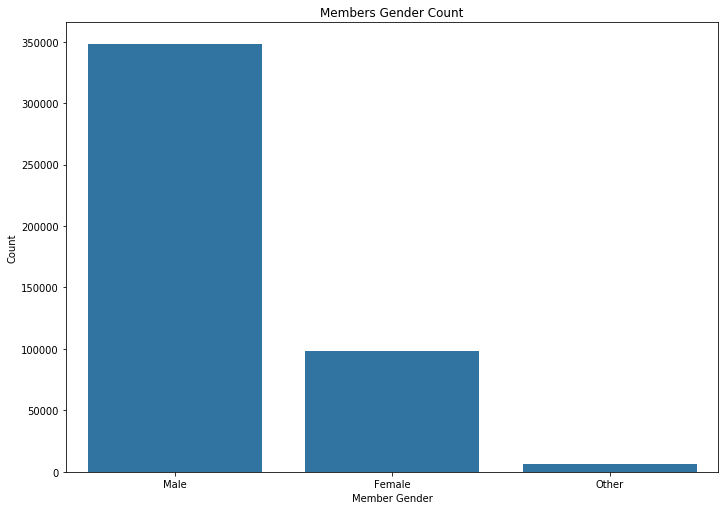

In [17]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.countplot(data = df_clean, x = 'member_gender', color = sb.color_palette()[0]);
ax.set(xlabel='Member Gender', ylabel='Count')
plt.title('Members Gender Count', fontdict=None, loc='center', pad=None)

> It is clear from the graph above that the number of men interested in driving bicycles is three times the number of women.

In [18]:
df_clean.member_gender.value_counts()

Male      348318
Female     98542
Other       6299
Name: member_gender, dtype: int64

Text(0.5, 1.0, 'Members Age Count')

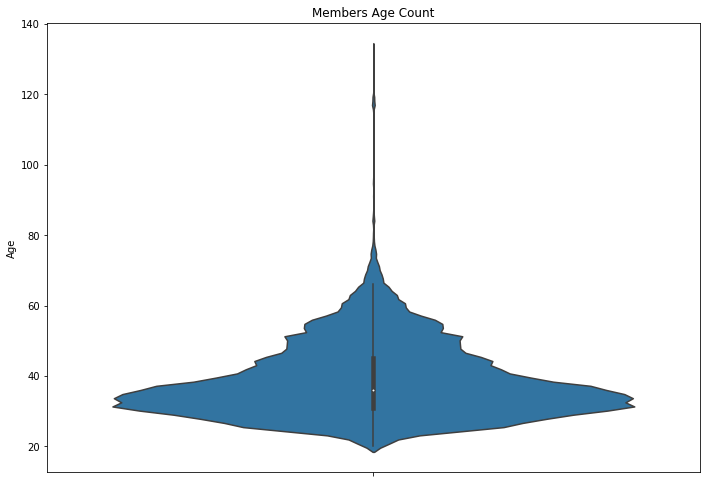

In [19]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.violinplot(data = df_clean, y = 'member_age');
ax.set(ylabel='Age')
plt.title('Members Age Count', fontdict=None, loc='center', pad=None)

> It is clear from the above chart that the ages of most of the bikers are between 20 and 40 years old.

In [20]:
# removeing the extream outliners.
df_clean = df_clean[df_clean['member_age'] <= 90]

In [21]:
df_clean['member_age'].describe()

count    452680.000000
mean         38.516731
std          10.233451
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max          86.000000
Name: member_age, dtype: float64

Text(0.5, 1.0, 'Duration In Minutes')

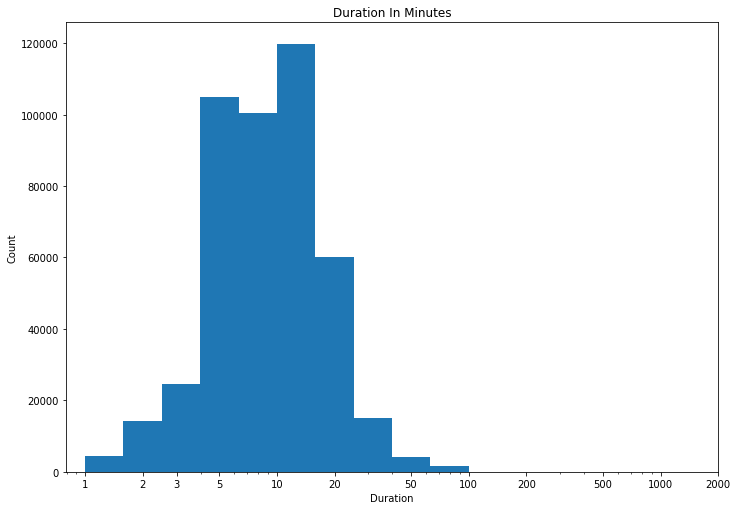

In [36]:
binsize = 0.2
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+binsize, binsize)
plt.figure(figsize = [11.69, 8.27]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Duration In Minutes', fontdict=None, loc='center', pad=None)

> Here we can see that the average number of minutes that cyclists drive is 10 minutes.

In [23]:
# removeing the extream outliners.
df_clean = df_clean[df_clean['duration_min'] <= 100]

In [24]:
df_clean['duration_min'].describe()

count    449198.000000
mean         10.754839
std           8.537896
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max         100.000000
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Bike Per Days')

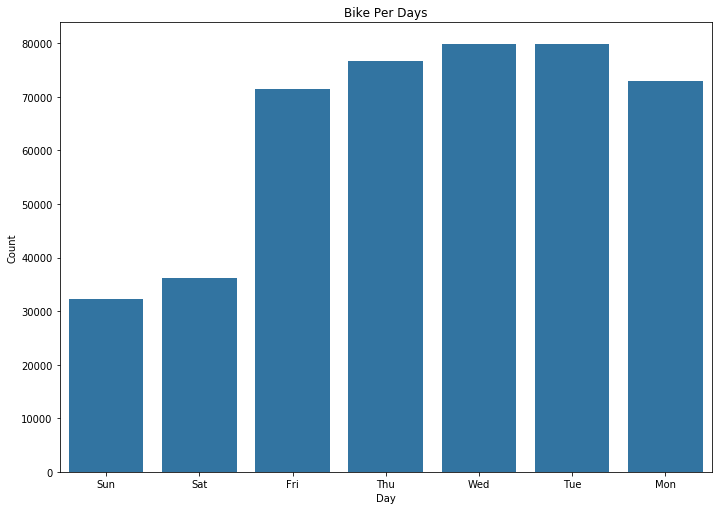

In [25]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.countplot(data = df_clean, x = 'start_time_day', color = sb.color_palette()[0]);
ax.set(xlabel='Day', ylabel='Count')
plt.title('Bike Per Days', fontdict=None, loc='center', pad=None)

 > On Sunday and Monday are the lowest rounds numbers, Wednesday and Thursday are the most days 

Text(0.5, 1.0, 'Bike Per Hours')

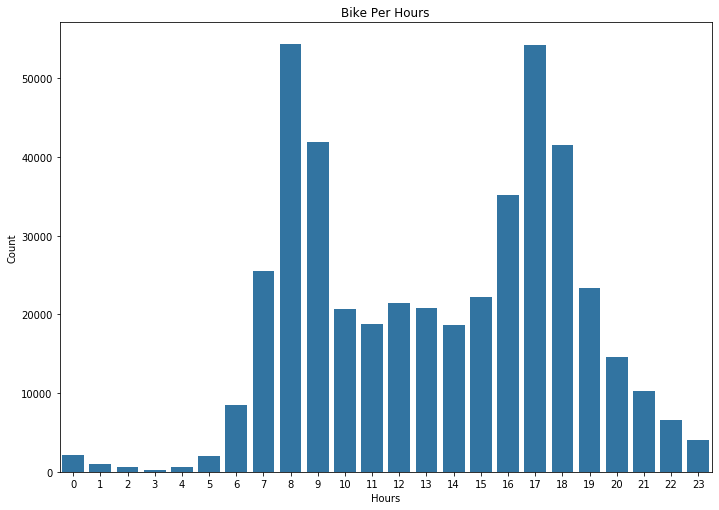

In [26]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.countplot(data = df_clean, x = 'start_time_hour', color = sb.color_palette()[0])
ax.set(xlabel='Hours', ylabel='Count')
plt.title('Bike Per Hours', fontdict=None, loc='center', pad=None)

> The peak hours are eight in the morning and five in the evening.

## Bivariate Exploration


Text(0.5, 1.0, 'Biker Gender Per Days')

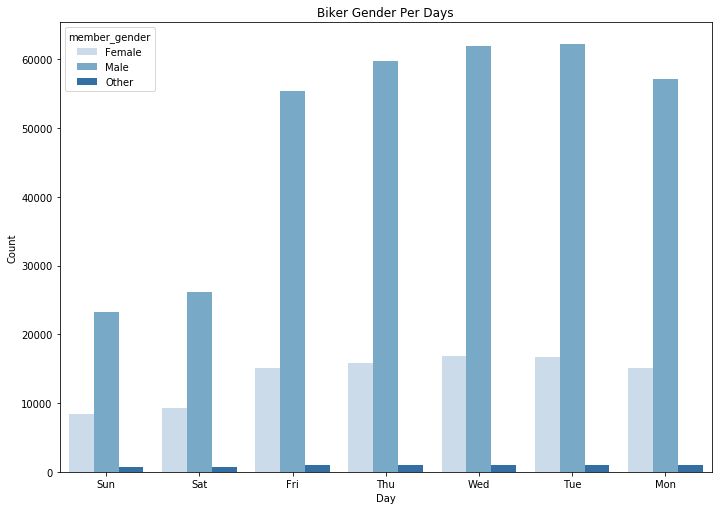

In [27]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.countplot(data = df_clean, x = 'start_time_day', hue = 'member_gender', palette = 'Blues');
ax.set(xlabel='Day', ylabel='Count')
plt.title('Biker Gender Per Days', fontdict=None, loc='center', pad=None)

> Observations:
>From the diagram above, the effect of the days on cyclists of both genders is close and relevant.

Text(0.5, 1.0, 'Biker Gender Per Hours')

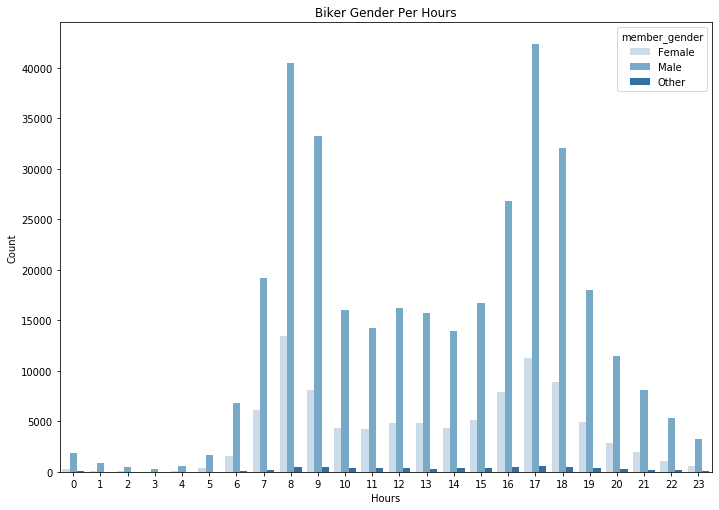

In [28]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'Blues');
ax.set(xlabel='Hours', ylabel='Count')
plt.title('Biker Gender Per Hours', fontdict=None, loc='center', pad=None)

> With regard to peak times, it appears that the number of women at eight in the morning is more than five in the afternoon by a slight difference, while for men the number of them at five in the afternoon is slightly greater than what it is at eight in the morning.

Text(0.5, 1.0, 'Duration In Minutes Per Age')

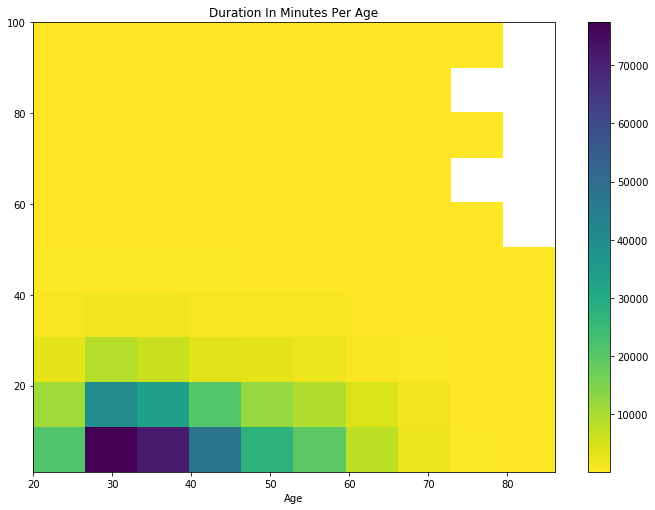

In [29]:
plt.figure(figsize = [11.69, 8.27]);
plt.hist2d(data = df_clean,x = 'member_age',y='duration_min',cmin=0.1,cmap = 'viridis_r');
plt.colorbar();
plt.xlabel('Age');
plt.title('Duration In Minutes Per Age', fontdict=None, loc='center', pad=None)

> Bicycle riders between the ages of 25-40 are ride the longest times compared to the rest of them.

Text(0.5, 1.0, 'User Type Per Hours')

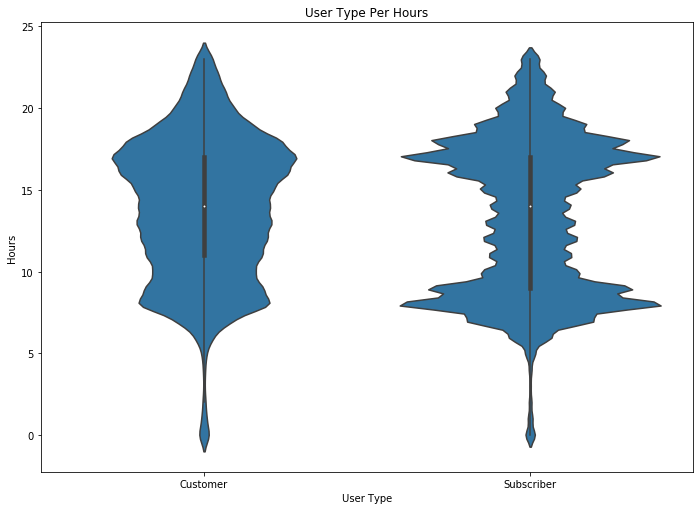

In [30]:
plt.figure(figsize = [11.69, 8.27]);
ax = sb.violinplot(data = df_clean ,x = 'user_type',y='start_time_hour',color = sb.color_palette()[0]);
ax.set(xlabel='User Type', ylabel='Hours')
plt.title('User Type Per Hours', fontdict=None, loc='center', pad=None)

> The rush hours for the Subscriber user type are 8:00 am and 5:00 pm , For Customer user type is 5:00 pm. 

## Multivariate Exploration


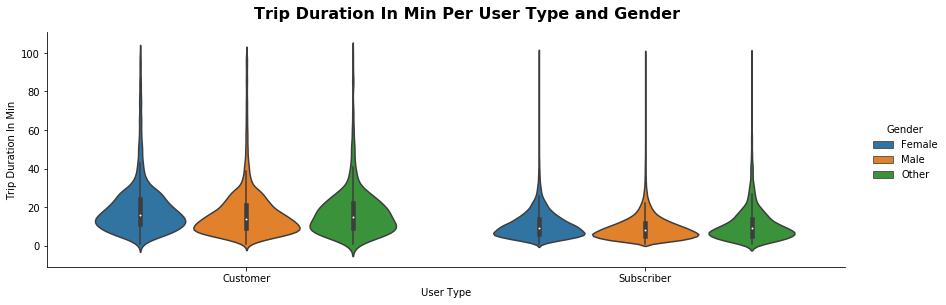

In [31]:
# Duration in min per user type and gender
graph = sb.catplot(data=df_clean, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=4, aspect=3);
graph.set_axis_labels("User Type", "Trip Duration In Min")
graph._legend.set_title('Gender')
graph.fig.suptitle('Trip Duration In Min Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

> It is clear from the above chart that the average minutes duration for men and women, whether they are Subscriber or Customer user type is almost 10 minutes.

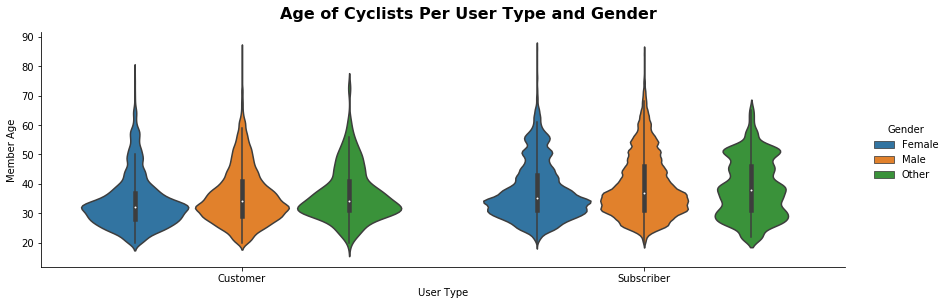

In [32]:
# Duration in min per user type and gender
graph = sb.catplot(data=df_clean, x='user_type', y="member_age", hue="member_gender", kind="violin", height=4, aspect=3);
graph.set_axis_labels("User Type", "Member Age")
graph._legend.set_title('Gender')
graph.fig.suptitle('Age of Cyclists Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

 > It is clear from the above chart that the average age for men and women, whether they are Subscriber or Customer user type is almost 39 .

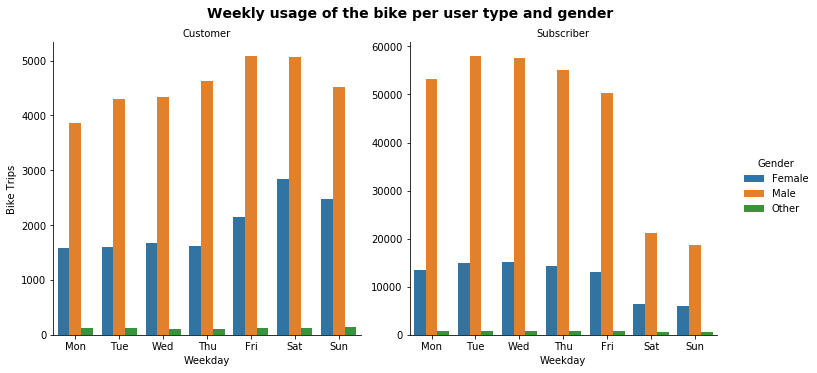

In [33]:
# weekday per user type and gender
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_day', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


>  It is clear from this chart that the number of women Subscriber user type is greater than the number of women of Customer user type.

> The peak days for women of Customer user type are in SAT and SUN and for women of Subscriber user type are Tue and WED. 
 
> same observation for men where the number of men Subscriber user type is greater than the number of men of Customer user type.

> The peak days for men of Customer user type are in SAT and FRI and for men of Subscriber user type are Tue and WED. 
 